In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

</pre>

### Generovani obecne nahodne veliciny
#### Zamitaci metoda pro generovani spojite nahodne veliciny
1. mam interval <a; b> a na nem hustotu pravdepodobnosti
2. bombarduju interval tak aby kde je funkce bylo hodne bodu a mimo malo
3. pokud rovnomerne bombaruju osu x a y tak bombarduju rovnomerne i tu plochu
4. vezmu jen vzorky, ktere jsou pod hustotou pravdepodobnosti
5. kouknu jen na x-ovou souradnici -> bodu jsou umerne funkci </br>
    i. dukaz ze ty body tvori hustotu pravdepodobnosti? 
     
<pre/>

In [2]:
def get_point(domain_limits, upper_limit):
    x_coord = np.random.uniform(0, 1) * (domain_limits[0] - domain_limits[1]) + domain_limits[1]
    y_coord = np.random.uniform(0, 1) * upper_limit
    return x_coord, y_coord

def is_under(x_coord, y_coord, pdf_prop):
    return y_coord < pdf_prop(x_coord)

In [3]:
pdf_prop = lambda x: 0.5 * np.sin(x + 0.5 * math.pi) # pdf_proportional
domain_limits = [0, math.pi]  # obor hodnot
func = lambda x: x - 0.5 * math.pi
domain_limits = np.apply_along_axis(func, 0, domain_limits)
upper_limit = 1

In [4]:
_is_under = False
x_coord, y_coord = get_point(domain_limits, upper_limit)
NUM_SAMPLES = 1e06
x_coords = []
y_coords = []

for i in range(int(NUM_SAMPLES)):
    x_coord, y_coord = get_point(domain_limits, upper_limit)
    _is_under = is_under(x_coord, y_coord, pdf_prop)
    #print(y_coord < pdf_prop(x_coord), _is_under)
    if _is_under:
        x_coords.append(x_coord)
        y_coords.append(y_coord)
        #print(f"x: {x_coord} \t x: {y_coord}")


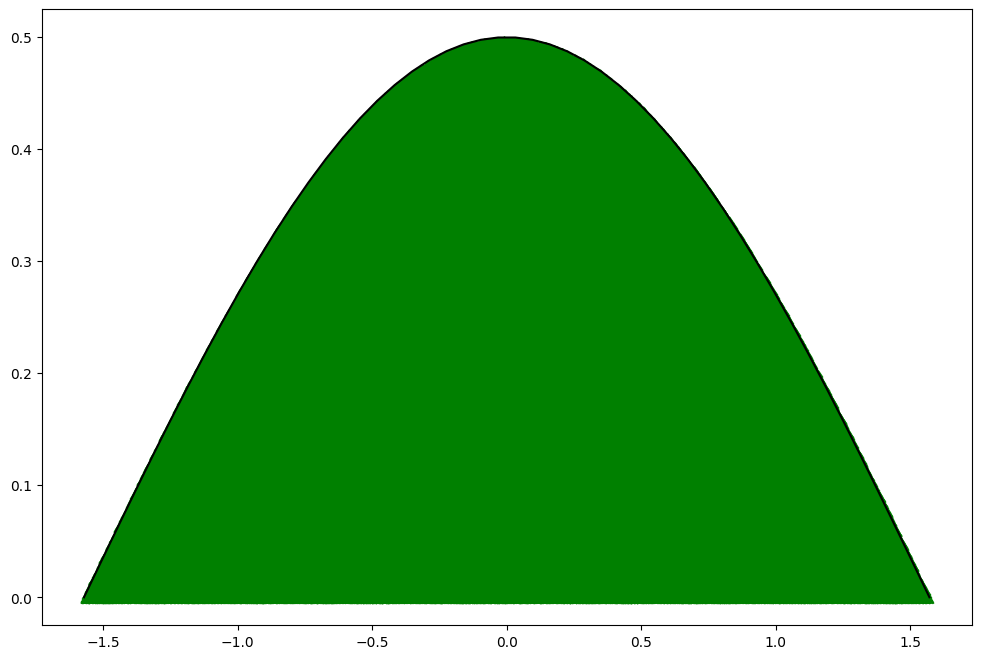

In [5]:
x = np.linspace(domain_limits[0], domain_limits[1])
plt.figure(figsize=(12, 8))
plt.plot(x, np.apply_along_axis(pdf_prop, 0, x), 'k')
plt.scatter(x_coords, y_coords, c=['green'], marker=6)


In [6]:

SAMPLE_SIZE = 10**4
x_uniform = np.random.uniform(0, 1, SAMPLE_SIZE)
y_exp = np.random.exponential(1) * x_uniform


In [7]:
_lambda = 1
inv_exp = lambda x: -1/_lambda * np.log(x)
y_inv_exp = np.apply_along_axis(inv_exp, 0, y_exp)

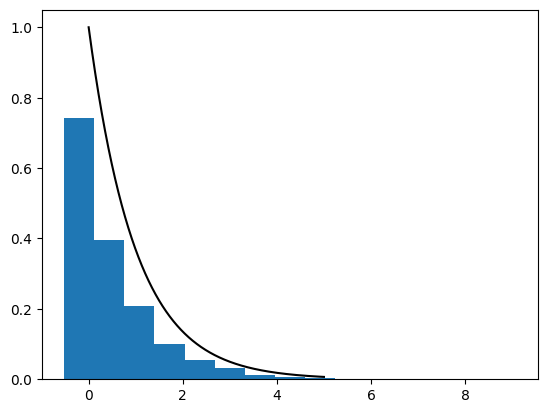

In [29]:
x = np.linspace(0, 5, 1000000)
exp_pdf = lambda x: np.exp(-x)
yy = np.apply_along_axis(exp_pdf, 0, x)
plt.hist(y_inv_exp, bins=15, density=True)
plt.plot(x, yy, 'k')

In [9]:
SAMPLE_SIZE = 10**4
y_coordds = exp_pdf_value * np.random.random(SAMPLE_SIZE)
x = np.random.exponential(1, SAMPLE_SIZE)
exp_pdf_value = np.exp(-x) # hodnota hustoty pravdepodobnosti
y_coords = exp_pdf_value * np.random.random(SAMPLE_SIZE)

pdf_norm = lambda x: np.random.normal(x)

NameError: name 'exp_pdf_value' is not defined

In [ ]:
y_norm = y_coords[y_coords < pdf_norm(x)]
x_norm = x[y_coords < pdf_norm(x)]
print(len(x_norm), len(y_norm))

# DODELAT priklad


In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(x, exp_pdf_value)
plt.scatter(x, y_coords)
plt.scatter(x_norm, y_norm)